In [69]:
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import mlem
from mlem.api import load
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [70]:
path = './assets/formart_house.csv'
df = pd.read_csv(path)
df.shape
#dataset 507 rows, 14 columns


(507, 14)

In [71]:
df.head()
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9
506,is,not,a,ro,ck,et,sc,ie,nce,i,sn,'t,it,?


In [72]:
df_clean=df.drop(506, 0)





/tmp/ipykernel_48596/1955108346.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_clean=df.drop(506, 0)


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  medv     507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [74]:
df_clean = df_clean.astype(float)

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [76]:
df_clean.rename( columns={'medv':'price'}, inplace=True)

In [77]:
X = df_clean.drop(columns=['price'])
y = df_clean['price']

In [78]:
# norm = MinMaxScaler() 
# pre_norm = norm.fit_transform(X) 

# print(pre_norm)

# df_new = pd.DataFrame(pre_norm, columns=X.columns,index=df_clean.index)
# X = df_new

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
f'verox {x_train.shape}testx {x_test.shape}veroy {y_train.shape}testy {y_test.shape}'

'verox (404, 13)testx (102, 13)veroy (404,)testy (102,)'

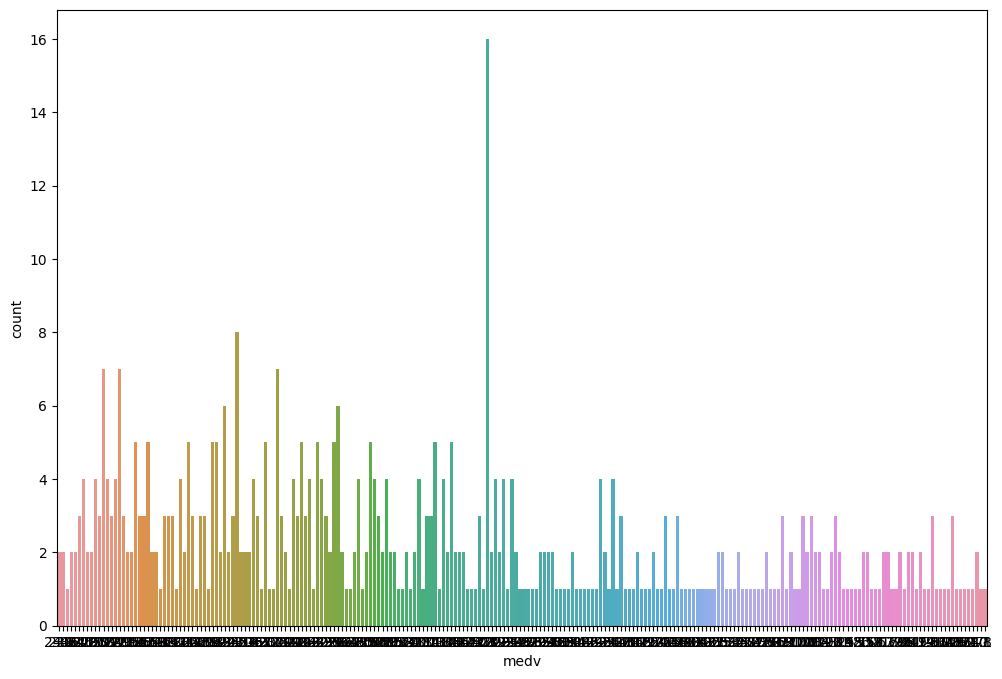

In [81]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x='medv',data=df)
plt.show(fig)


In [82]:
# sns.pairplot(data=df_clean)

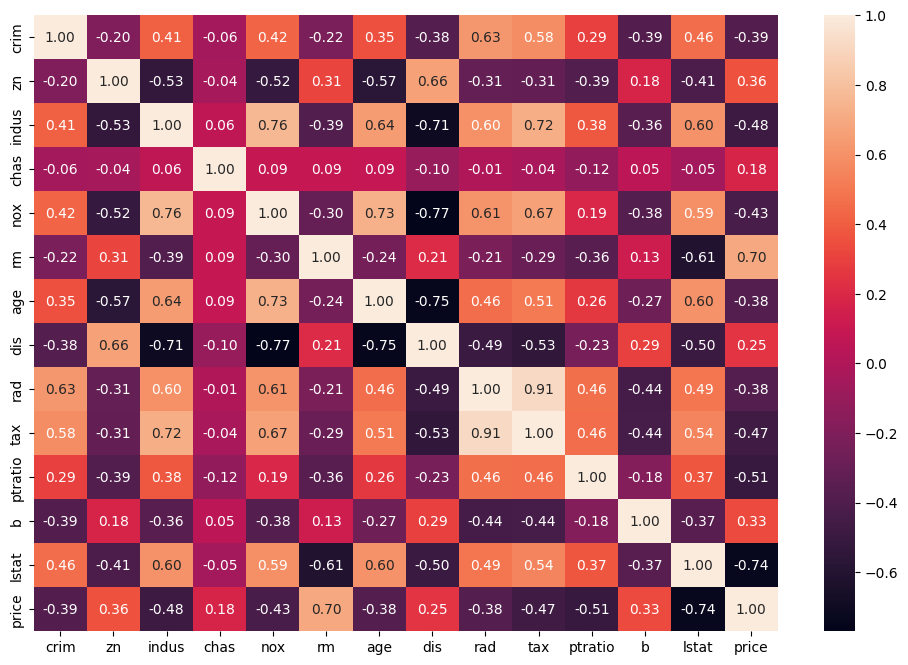

In [83]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f')
plt.show(fig)

In [84]:
regr = LinearRegression()

In [85]:
regr.fit(x_train, y_train)

LinearRegression()

In [86]:
preds = regr.predict(np.array(x_test))

/home/andrea/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
y_test.head()

229    31.5
205    22.6
498    21.2
81     23.9
317    19.8
Name: price, dtype: float64

In [88]:
np.round(preds, 1)

array([31.1, 22.5, 21.2, 27. , 18.2, 40.7, 19.4, 27.8, 16.9, 32.7,  2.8,
       12.3, 20.2, 18.9, 27.2, 28.9, 19.4, 25.6, 25.5, 24.7, 33.3, 27.4,
        8.2, 23.6,  7.5, 22.8, 17.8, 12.8, 24.2, 36.5, 29.3, 32.9, 34.5,
       12.7, 13. , 18.2, 21.6, 17.6, 13.7, 29.5, 33.1, 40. , 16.1,  8.5,
       17. , 28.8, 13.3, 22. ,  8. , 24.9, 18.4,  6. , 24.8, 32.3, 28.2,
       22.6, 37.4, 19.6, 15.7, 21. , 23.4, 23.4, 11.6, 35.5, 21.9, 14.7,
        8.8, 19.2, 22.7, 19.2, 35. , 24.2, 11.3, 18.3, 33.7, 18. , 20.4,
       17.7, 14.2, 34.5, 20.3, 19.6, 27.8, 13.3, 27.5, 25.1, 21.9, 26.7,
       20.1, 18.3, 25.5, 25.7, 19.7, 36.1, 30.6, 30.1, 25.7, 36.8,  5.6,
       32.8, 41.9, 15.8])

In [89]:
residuals = preds - y_test

In [90]:
# plt.hist(residuals) 

In [91]:
r2score = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)

print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  0.7974984260090989
MAE:  3.0210896880916356
MSE:  16.58361862756761
RMSE:  4.072298936420018


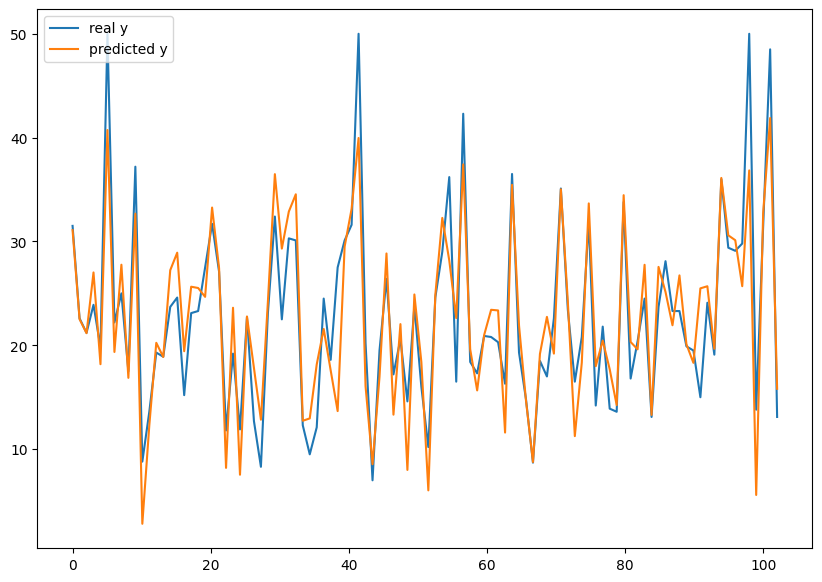

In [92]:
fig= plt.figure(figsize=(10,7))
x = np.linspace(0,len(y_test),len(y_test))

plt.plot(x, y_test, label='real y')
plt.plot(x, preds, label="predicted y")
plt.legend(loc=2); 
plt.show(fig)

In [93]:
import mlem

In [94]:
mlem.api.save(regr,
              'model_', # model_.mlem
              sample_data = x_train #features
              )

MlemModel(location=Location(path='/home/andrea/Desktop/prova_sommativa_03-05-23/model_.mlem', project=None, rev=None, uri='file:///home/andrea/Desktop/prova_sommativa_03-05-23/model_.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x7f91778dad40>), params={}, artifacts={'data': LocalArtifact(uri='model_', size=782, hash='a5954c3e5bc312358aa4e5d16672000d')}, requirements=Requirements(__root__=[InstallableRequirement(module='sklearn', version='1.2.2', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='numpy', version='1.24.3', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='1.5.0', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None)]), processors_cache={'model': SklearnModel(model=LinearRegression(), io=SimplePickleIO(), methods={'predict': Signature(name='predict', args=

In [95]:
!cat model_.mlem


artifacts:
  data:
    hash: a5954c3e5bc312358aa4e5d16672000d
    size: 782
    uri: model_
call_orders:
  predict:
  - - model
    - predict
object_type: model
processors:
  model:
    methods:
      predict:
        args:
        - name: X
          type_:
            columns:
            - ''
            - crim
            - zn
            - indus
            - chas
            - nox
            - rm
            - age
            - dis
            - rad
            - tax
            - ptratio
            - b
            - lstat
            dtypes:
            - int64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            - float64
            index_cols:
            - ''
            type: dataframe
        name: predict
        returns:
          dtype: float64
    